In [1]:
import numpy as np
# CNNのデータ
x = np.random.rand(2, 3, 2, 2) # 2つのデータ：３チャンネル、２×２
print(x.shape)
print(x)

(2, 3, 2, 2)
[[[[0.25497366 0.56846035]
   [0.04521363 0.76598149]]

  [[0.96301921 0.72796039]
   [0.93580757 0.95107122]]

  [[0.79538642 0.08668937]
   [0.21632262 0.71525357]]]


 [[[0.15275359 0.169905  ]
   [0.12487801 0.56480122]]

  [[0.63490952 0.84719159]
   [0.15482034 0.33841503]]

  [[0.26150574 0.87011574]
   [0.18465315 0.06186255]]]]


In [2]:
#0番目のデータを指定
print(x[0].shape)
print(x[0])

(3, 2, 2)
[[[0.25497366 0.56846035]
  [0.04521363 0.76598149]]

 [[0.96301921 0.72796039]
  [0.93580757 0.95107122]]

 [[0.79538642 0.08668937]
  [0.21632262 0.71525357]]]


In [3]:
# 0番目のデータの2番目チャンネルのデータを指定
print(x[0][2])

[[0.79538642 0.08668937]
 [0.21632262 0.71525357]]


In [4]:
# パディング
x_paded = np.pad(x, [(0,0), (0,0), (1, 1), (1, 1)], 'constant')
print(x_paded)

[[[[0.         0.         0.         0.        ]
   [0.         0.25497366 0.56846035 0.        ]
   [0.         0.04521363 0.76598149 0.        ]
   [0.         0.         0.         0.        ]]

  [[0.         0.         0.         0.        ]
   [0.         0.96301921 0.72796039 0.        ]
   [0.         0.93580757 0.95107122 0.        ]
   [0.         0.         0.         0.        ]]

  [[0.         0.         0.         0.        ]
   [0.         0.79538642 0.08668937 0.        ]
   [0.         0.21632262 0.71525357 0.        ]
   [0.         0.         0.         0.        ]]]


 [[[0.         0.         0.         0.        ]
   [0.         0.15275359 0.169905   0.        ]
   [0.         0.12487801 0.56480122 0.        ]
   [0.         0.         0.         0.        ]]

  [[0.         0.         0.         0.        ]
   [0.         0.63490952 0.84719159 0.        ]
   [0.         0.15482034 0.33841503 0.        ]
   [0.         0.         0.         0.        ]]

  [[0.  

In [5]:
def im2col_temp(input_data, filter_h, filter_w, stride=1, pad=0): # フィルターの平坦化された要素に合わせて入力も平坦化する
    """

    Parameters
    ----------
    input_data : (データ数, チャンネル, 高さ, 幅)の4次元配列からなる入力データ
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング

    Returns
    -------
    col : 2次元配列
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    print("出力の縦out_h:", out_h)
    print("出力の横out_w:", out_w)

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

        # フィルター要素の行方向のインデックス
    for y in range(filter_h):
        # 出力分行方向にスライドした結果の最終地点
        y_max = y + stride * out_h

        # フィルター要素の列方向のインデックス
        for x in range(filter_w):
            # 出力分列方向にスライドした結果の最終地点
            x_max = x + stride * out_w

            # フィルター内の要素(y,x)が(y_max, x_max)までスライに拾っドしている間た入力要素を抽出
            # e.g_1 フィルターの左上(0,0)がスライドしていった時拾った入力要素を抽出
            # e.g_2 filter_h[0]かつfilter_w[0]ののところに抽出した入力要素を格納
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
            print("各データでフィルター要素 y:" + str(y) + ", x:" + str(x) + "が拾った要素:")
            print(col[:, :, y, x, :, :])

            # 出力サイズに整形
            # それぞれの出力（行）に対してフィルターの要素（列）があるように２次元の配列にする
            # e.g_3 フィルター左上(0,0)が抽出した入力要素が各出力に対して１番目（1列目）の要素として格納される（ループで２列目、３列目とフィルターの要素の数だけ続く）
            input_data_col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
            # 出力が何個あるか縦に平坦化（さらにデータNの倍数分出力が縦に並ぶ）
            print("出力の合計（出力の要素数(", out_h*out_w, ")×データ数(", N, ")：", N*out_h*out_w) #e.g. データ２個、出力２×２：８個の出力が縦並び
            #フィルターの要素を横に平坦化（さらにチャンネルの倍数分横に並ぶ）
            print("フィルターの要素数(", filter_h*filter_w, ")×チャンネル数(", C, ")：", C*filter_h*filter_w) # e.g. ３チャンネル3×3のフィルター：９個の要素が横並び
            print("======フィルター要素 y:" + str(y) + ", x:" + str(x) + "が拾った要素をそれぞれの出力（行）に対して左から詰めていく ==========")
            print(input_data_col)
    print("それぞれの出力に対して各フィルター要素が拾ったの入力要素が詰め込まれた２次元の形状", input_data_col.shape)

In [6]:
# 3×4の1チャンネルを持つ2つのデータを持つ4次元配列を作成
x = np.array([
    [
        [
            [1, 2, 3, 4],
            [11, 22, 33, 44],
            [111, 222, 333, 444]
        ]
    ],
    [
        [
            [5, 6, 7, 8],
            [55, 66, 77, 88],
            [555, 666, 777, 888]
        ]
    ]
])
print("入力形状：", x.shape)

x_col =  im2col_temp(x, filter_h=2, filter_w=2, stride=1, pad=0)


入力形状： (2, 1, 3, 4)
出力の縦out_h: 2
出力の横out_w: 3
各データでフィルター要素 y:0, x:0が拾った要素:
[[[[ 1.  2.  3.]
   [11. 22. 33.]]]


 [[[ 5.  6.  7.]
   [55. 66. 77.]]]]
出力の合計（出力の要素数( 6 )×データ数( 2 )： 12
フィルターの要素数( 4 )×チャンネル数( 1 )： 4
======フィルター要素 y:0, x:0が拾った要素をそれぞれの出力に対して左から詰めていく ==========
[[ 1.  0.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 3.  0.  0.  0.]
 [11.  0.  0.  0.]
 [22.  0.  0.  0.]
 [33.  0.  0.  0.]
 [ 5.  0.  0.  0.]
 [ 6.  0.  0.  0.]
 [ 7.  0.  0.  0.]
 [55.  0.  0.  0.]
 [66.  0.  0.  0.]
 [77.  0.  0.  0.]]
各データでフィルター要素 y:0, x:1が拾った要素:
[[[[ 2.  3.  4.]
   [22. 33. 44.]]]


 [[[ 6.  7.  8.]
   [66. 77. 88.]]]]
出力の合計（出力の要素数( 6 )×データ数( 2 )： 12
フィルターの要素数( 4 )×チャンネル数( 1 )： 4
======フィルター要素 y:0, x:1が拾った要素をそれぞれの出力に対して左から詰めていく ==========
[[ 1.  2.  0.  0.]
 [ 2.  3.  0.  0.]
 [ 3.  4.  0.  0.]
 [11. 22.  0.  0.]
 [22. 33.  0.  0.]
 [33. 44.  0.  0.]
 [ 5.  6.  0.  0.]
 [ 6.  7.  0.  0.]
 [ 7.  8.  0.  0.]
 [55. 66.  0.  0.]
 [66. 77.  0.  0.]
 [77. 88.  0.  0.]]
各データでフィルター要素 y:1, x:0が拾った要素:
[[[[ 11.  22.  3

In [7]:
# 平坦化されたフィルターの要素に合わせて入力画像の要素も平坦化する（N*OH*OW(アウトプット数), C*FH*FW(フィルターの要素数)）
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    input_data : (データ数, チャンネル, 高さ, 幅)の4次元配列からなる入力データ
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング

    Returns
    -------
    col : 2次元配列
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    # print("out_h:", out_h)
    # print("out_w:", out_w)

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        print("y: ", y )
        y_max = y + stride*out_h
        print("y_max: ", y_max)
        for x in range(filter_w):
            print("x: ", x )
            x_max = x + stride*out_w
            print("x_max: ", x_max)
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
            print(img[:, :, y:y_max:stride, x:x_max:stride])
            # print(col[:, :, y, x, :, :])

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [12]:
import numpy as np
import sys, os
os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch03")
sys.path.append(os.pardir)

from common.util import im2col, col2im

class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape # 入力画像（４次元）
        FN, C, FH, FW = self.W.shape # 重みフィルター（４次元）
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride) #出力の行数
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride) #出力の列数

        # 入力画像（N,C,H,W）を２次元（N*OH*OW(アウトプット数), C*FH*FW(フィルターの要素数)）に変換
        col = im2col(x, FH, FW, self.stride, self.pad) # 入力Xの役割
        # 重みフィルター(FN,C,FH,FW)を２次元（FN(フィルターの数), C*FH*FW(フィルターの要素)）に変換して転置(C*FH*FW(フィルターの要素), FN(フィルターの数))
        col_W = self.W.reshape(FN, -1).T # 重みWの役割
        out = np.dot(col, col_W) + self.b # この時点ではまだ２次元データ（出力の数（N*out_h*out_w）×フィルターの数(FN)）

        # ２次元データ（出力の数（N*out_h*out_w）×フィルターの数(FN)）を4次元データに変換
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2) # (N, FN, OH, OW)

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


In [13]:
class Pooling:
    def __init__(self, pool_h, pool_W, stride=2, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_W
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape
        # 出力データに関するサイズを計算
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        # 入力画像（N,C,H,W）を２次元（N*OH*OW(アウトプット数), C*PH*PW(フィルター(pool)の要素数)）に変換
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        # Convだと全チャンネルの入力とフィルタ数値の積和が求めるが、poolではチャンネル別にの最大値を求める
        # C*PH*PWだとフィルター要素が拾った入力要素数×チャンネル数で１行に並ぶ　が、poolはチャンネ別にしたいからCを除外したい
        col = col.reshape(-1, self.pool_h*self.pool_w) # (N*OH*OW*C, PH*PW)

        # 各行の最大値
        out = np.max(col, axis=1) # (N*OH*OW*C, 1)

        # まずreshapeで(N, OH, OW, C)の区切り方に変更（要素の並び順図らない）
        # 次にtransposeで(N, C, OH, OW)に入れ替える（要素の並びが出力のための適切な形状）
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)

        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,))

        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)

        return dx

In [14]:
# coding: utf-8
import sys, os
os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch03")
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """単純なConvNet

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = int((input_size - filter_size + 2*filter_pad) / filter_stride + 1)
        # プーリングのフィルターサイズが2×2でストライドが2の場合、プーリング層の出力サイズは常に畳み込み層の出力サイズの半分
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size) #(FN, C, FH, FW)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    # 学習途中・終了時のパラメータをファイルに保存し、後で再利用できるようにする
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    # 保存されたパラメータを再利用するためロードする
    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

No. 1 train loss:2.2995746974473987
No. 2 train loss:2.296878963979722
No. 3 train loss:2.292720393291769
No. 4 train loss:2.2828924064688505
No. 5 train loss:2.2786517795172934
No. 6 train loss:2.264715680058616
No. 7 train loss:2.249833123722322
No. 8 train loss:2.2282298101968885
No. 9 train loss:2.220431431703736
No. 10 train loss:2.2182116955954454
No. 11 train loss:2.1563444958237956
No. 12 train loss:2.1476454453349114
No. 13 train loss:2.0965100315853094
No. 14 train loss:2.0313791560272203
No. 15 train loss:1.9725293052167532
No. 16 train loss:1.955489912183449
No. 17 train loss:1.8371018021100198
No. 18 train loss:1.760393312665667
No. 19 train loss:1.757633196718424
No. 20 train loss:1.5791983242968046
No. 21 train loss:1.5029962481869652
No. 22 train loss:1.4780608822001784
No. 23 train loss:1.4114437532154123
No. 24 train loss:1.2855105736875023
No. 25 train loss:1.2215973368222008
No. 26 train loss:1.0668098635133167
No. 27 train loss:1.0887023781753233
No. 28 train loss:

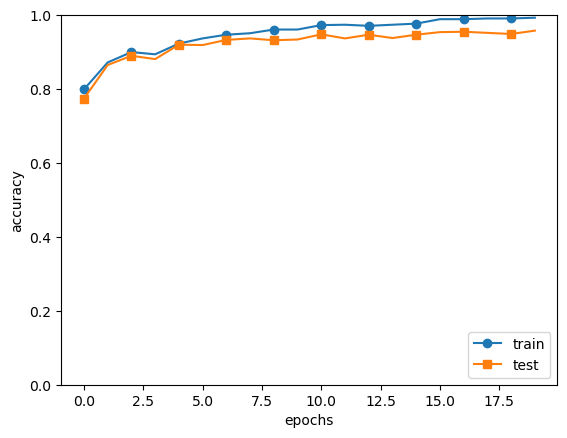

In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
# from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
